# CPSC 440 – Homework 3 - Solutions - Kyle

# - Due in class on Tuesday, February 16, 2016

## 1. (4 points) Suppose that a researcher has collected some data and calculated a sample mean of $\bar{Y} = 30.2$ and a sample standard deviation of $s = 36$ from a set of 36 observations. 

a.(1 point) From previous work, it was determined that the population mean μ is less than or equal to 23. Conduct a hypotheses test to determine if these data provide enough evidence to conclude that the population mean is actually greater than 23. Show all seven steps of the hypothesis test, and conduct the test at $\alpha=0.05$.



In [53]:
## put in the 7 steps of a hypothesis test
y_bar <- 30.2
s <- 36
n <- 36
mu_0 <- 23
se <- s/sqrt(n)
t_obs <- (y_bar-mu_0)/se
alpha <- 0.05

p_val <- 1-pt(t_obs, df=n-1)

p_val <- as.matrix(p_val)
colnames(p_val) <- c("P value for t-test")
p_val

P value for t-test
0.1190996


Thus, we fail to reject the t-test at the $\alpha=0.05$ level.

## b. (1 point) Within the context of this test, explain what a Type I error is. Given the test statistic value calculated in a.), please state how likely you think it is that a Type I error occurred.


Within the context of this text, the Type I error would be the event in which we reject the null hypothesis, yet the null hypothesis is actually true.

c.(2 points) Calculate the probability of a Type II error if the actual mean of the population, $\mu$, is 29. As part of this draw the density function for the distribution under the null hypothesis and then also draw the density function assuming  is 29. On these density functions show the rejection region and shade in the area that corresponds to the probability of a Type II error.

In [54]:
mu_a <- 29
se <- s/sqrt(n)
beta <- pnorm(abs(qnorm(alpha)) - abs(mu_0 - mu_a)/se)

beta <- as.matrix(beta)
colnames(beta) <- c("Type II error for t-test")
beta

Type II error for t-test
0.740489


Warning message:
: Width not defined. Set with `position_dodge(width = ?)`

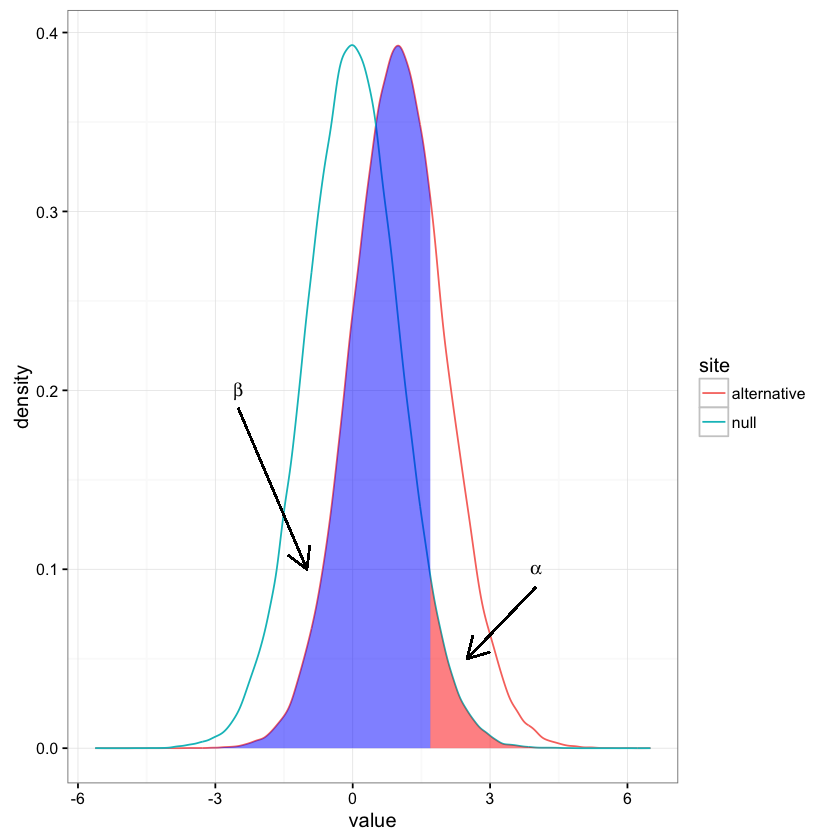

In [55]:
#  same data, just renaming columns for clarity later on
#  also, use data tables
library(data.table)
library(ggplot2)
set.seed(1)
ncp_t <- abs(mu_0 - mu_a)/se
value <- c(rt(100000, df=n-1), rt(100000, df=n-1, ncp = abs(ncp_t)))
site  <- c(rep("null", 100000), rep("alternative", 100000))
dt    <- data.table(site,value)
#  generate kdf
gg <- dt[,list(x=density(value)$x, y=density(value)$y),by="site"]
#  calculate quantiles
q1 <- quantile(dt[site=="null",value],.95)
q2 <- quantile(dt[site=="alternative",value],0.75)
# generate the plot
ggplot(dt) + stat_density(aes(x=value,color=site),geom="line",position="dodge")+
  geom_ribbon(data=subset(gg,site=="null" & x>q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5)+
  geom_ribbon(data=subset(gg,site=="alternative" & x<q2),
              aes(x=x,ymax=y),ymin=0,fill="blue", alpha=0.5) +
  annotate("text", x = -2.5, y = 0.2, label = c("beta"), parse=TRUE) + 
  annotate("text", x = 4, y = 0.1, label = c("alpha"), parse=TRUE) + 
  geom_segment(aes(x = -2.5, y = .19, xend = -1, yend = .1), arrow = arrow(length = unit(0.5, "cm"))) + 
  geom_segment(aes(x = 4, y = .09, xend = 2.5, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  theme_bw() 

## 2.(4 points) A researcher is interested in estimating the population mean concentration of a certain flavonoid compound in chickpea. This researcher has grown n = 49 chickpea plants and obtained a sample mean concentration level of $\bar{Y} = 21.3$  and sample standard deviation of $s=10.2$.


a.	(1 point) Calculate a 95% confidence interval (CI) for the population mean concentration .


In [56]:
y_bar <- 21.3
n <- 49
s<-10.2
se <- s/sqrt(n)
alpha <- 0.05
ci_t <- y_bar + c(-1,1)*abs(qt(alpha/2,df=n-1)*se)
ci_z <- y_bar + c(-1,1)*abs(qnorm(alpha/2)*se)
ci <- c(ci_t, ci_z)
ci <- matrix(round(ci,4), byrow = T, ncol=2, nrow=2)

colnames(ci) <- c("Lower Bound", "Upper Bound")
row.names(ci) <- c("T", "Z")

ci


,Lower Bound,Upper Bound
T,18.3702,24.2298
Z,18.4441,24.1559


For the preceding intervals,

T-interval:
$$
\bar{Y} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}
$$

Z-interval:
$$
\bar{Y} \pm Z_{\alpha/2}\frac{s}{\sqrt{n}}
$$

## b.	(1 point) How large of a sample size is needed for a 95% CI to have a tolerable error (W) value of 5 ?

In [57]:
E<- 2.5
n_t <- ceiling(abs(qt(alpha/2,df=n-1)^2)*s^2/E^2)

n_t

[1] 68

We see that using the t-interval, we need $\frac{t_{\alpha/2}s}{\sqrt{n}} = E$, thus $n = \frac{t_{\alpha/2}^2s^2}{E^2}$. An almost identical, yet slightly more anti-conservative sample size can be found using a $Z$ interval.

## c.	(1 point)  How large of a sample size is needed for a 90% CI to have a tolerable error (W) value of 5 ?

In [58]:
E<- 2.5
n <- ceiling(abs(qt(.05,df=n-1)^2)*s^2/E^2)

n

[1] 47

## d.	(1 point) Based on your answers to b.) and c.), do you think that a larger or smaller sample size (relative to the sample size calculated in b.) would be needed for a 99% CI to have a tolerable error (W) of 5 ? Briefly explain your answer.

In general, the larger the large sample probability coverage of the interval becomes (i.e. the confidence), the larger the sample must be. We can demonstrate this in the following plot of neccesary sample size v.s. the confidence value



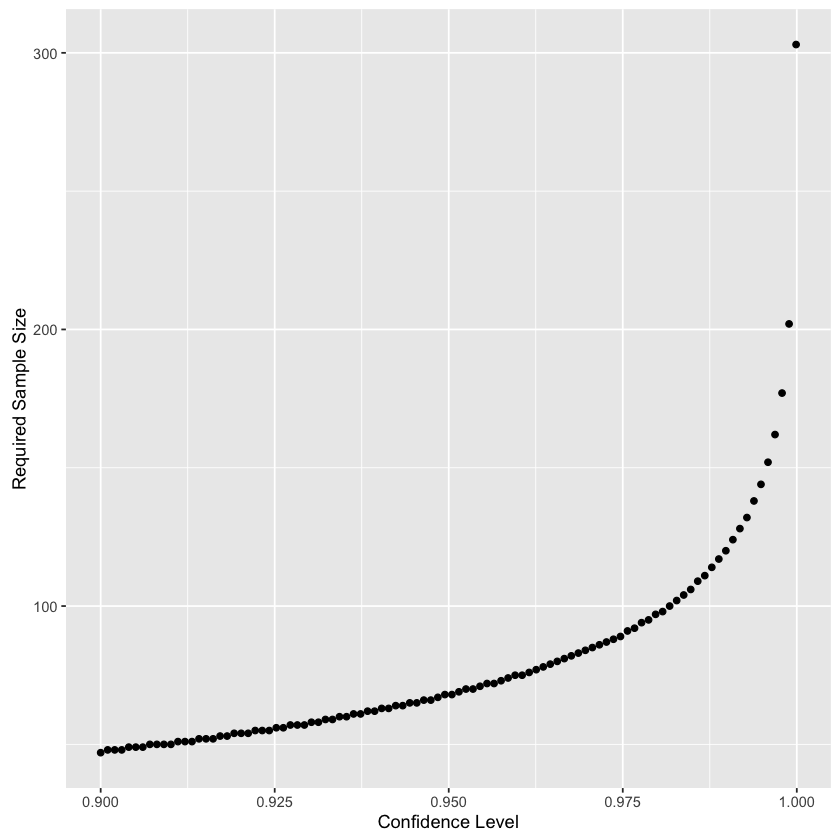

In [59]:
conf <- seq(0.9, 0.9999, length.out = 100)
alpha <- 1-conf
n <- ceiling(abs(qt(alpha/2,df=n-1)^2)*s^2/E^2)

plot_df <- data.frame(n=n, alpha=alpha)
ggplot(plot_df, aes(x=conf, y=n))+ geom_point() + 
    xlab(label = "Confidence Level") + 
    ylab("Required Sample Size")

## 3.(2 points) The chief executive officer (CEO) of a major technology company is concerned that a new policy of not having snacks readily available for their programmers in the workplace is resulting in a greater number of bugs in the code that they write.Suppose that prior to the implementation of this “no-snack” policy, the population mean was $\mu = 15$ errors per 1000 lines of delivered code. The CEO is interested in determining if the population mean number of bugs  has increas ed since the implementation of this policy. 


## a.(1 point) Write down the appropriate null and alternative hypotheses for testing whether the population mean number of errors per 1000 lines of delivered code has increased.


$$
H_0: \mu \leq 15 \text{ bugs per 1000 lines of code}
$$

$$
H_a: \mu > 15 \text{ bugs per 1000 lines of code}
$$


b.(1 point) What is the appropriate sample size for conducting this test at $\alpha=0.05$ if we want the probability of a Type II error, $\beta$, to be at most 0.20 when the actual rating is $\mu=20$? Assume that the population standard deviation is 10 errors per 1000 lines of delivered code.

In [60]:
sigma <- 10
alpha <- 0.05
beta <- 0.2
z_alpha <- abs(qnorm(alpha))
z_beta <- abs(qnorm(beta))
delta <- abs(15-20)
n <- ceiling(sigma^2*(z_alpha+z_beta)^2/delta^2)

n

[1] 25

Solving this problem just requires plugging the values into the formula $n = \sigma^2 \frac{(Z_\alpha + Z_\beta)^2}{\delta^2}$, where $\delta = \mu_1 - \mu_0$, and then taking the ceiling of $n$